# Harry Potter - Word Count comparison
### Import packages


We'll use "codecs" for reading the text files, "re" (for "regular expressions") and "collections" for working with tokens, and "nltk" ("natural language toolkit") in several operations.

In [1]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install nltk

In [2]:
import codecs
import re
import copy
import collections

import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib.pyplot as plt 

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading

True

Get the "stopwords" package from NLTK.

In [4]:
from nltk.corpus import stopwords

## Read data

In [5]:
with codecs.open("1_Sourcers_Stone.txt", "r") as f: #, encoding="utf-8")
    Sourcers = f.read()
with codecs.open("2_Chamber_of_Secrets.txt", "r") as f: #, encoding="utf-8")
    Chamber = f.read()
with codecs.open("3_Prisoner_of_Azkaban.txt", "r", encoding="Utf-8", errors ='ignore') as f:
    Prisoner = f.read()
with codecs.open("4_Goblet_of_Fire.txt", "r", encoding="Utf-8", errors ='ignore') as f:
    Goblet = f.read()
with codecs.open("5_Order_of_the_Phoenix.txt", "r") as f:
    Order = f.read()
with codecs.open("6_Half-Blood_Prince.txt", "r") as f:
    Half = f.read()
with codecs.open("7_Deathly_Hallows.txt", "r") as f:
    Deathly = f.read()

## Process data
Check for English stopwords.

In [6]:
esw = stopwords.words('english')
esw.append("would")

Filter tokens (using regular expressions).

In [7]:
word_pattern = re.compile("^\w+$")

Create a token counter function.

In [8]:
def get_text_counter(text):
    tokens = WordPunctTokenizer().tokenize(PorterStemmer().stem(text))
    tokens = list(map(lambda x: x.lower(), tokens))
    tokens = [token for token in tokens if re.match(word_pattern, token) and token not in esw]
    return collections.Counter(tokens), len(tokens)

Create a function to calculate the absolute frequency and relative frequency of the most common words.

In [9]:
def make_df(counter, size):
    abs_freq = np.array([el[1] for el in counter])
    rel_freq = abs_freq / size
    index = [el[0] for el in counter]
    df = pd.DataFrame(data=np.array([abs_freq, rel_freq]).T, index=index, columns=["Absolute frequency", "Relative frequency"])
    df.index.name = "Most common words"
    return df

## Analyze individual texts

In [10]:
n = 1000

In [11]:
one_counter, one_size = get_text_counter(Sourcers)
two_counter, two_size = get_text_counter(Chamber)
three_counter, three_size = get_text_counter(Prisoner)
four_counter, four_size = get_text_counter(Goblet)
five_counter, five_size = get_text_counter(Order)
six_counter, six_size = get_text_counter(Half)
seven_counter, seven_size = get_text_counter(Deathly)

one = make_df(one_counter.most_common(n), one_size)
two = make_df(two_counter.most_common(n), two_size)
three = make_df(three_counter.most_common(n), three_size)
four = make_df(four_counter.most_common(n), four_size)
five = make_df(five_counter.most_common(n), five_size)
six = make_df(six_counter.most_common(n), six_size)
seven = make_df(seven_counter.most_common(n), seven_size)

In [12]:
all_counter = one_counter + two_counter + three_counter + four_counter + five_counter + six_counter + seven_counter
all_df = make_df(one_counter.most_common(1000), 1)
most_common_words = all_df.index.values

In [13]:
df_data = []
for word in most_common_words:
    one_c = one_counter.get(word, 0) / one_size
    two_c = two_counter.get(word, 0) / two_size
    three_c = three_counter.get(word, 0) / three_size
    four_c = four_counter.get(word, 0) / four_size
    five_c = five_counter.get(word, 0) / five_size
    six_c = six_counter.get(word, 0) / six_size
    seven_c = seven_counter.get(word, 0) / seven_size
    total = one_counter.get(word, 0) + two_counter.get(word, 0) + three_counter.get(word, 0) + four_counter.get(word, 0) + five_counter.get(word, 0) + six_counter.get(word, 0) + seven_counter.get(word, 0)
    df_data.append([one_c, two_c, three_c, four_c, five_c, six_c, seven_c, total])
dist_df = pd.DataFrame(data=df_data, index=most_common_words,
                       columns=["Sourcer's Stone", "Chamber of Secrets", "Prisoner of Azkahban", "Goblet of Fire", 
                                "Order of the Phoenix", "Half-Blood Prince", "Deathly Hallows", "Total"])
dist_df.index.name = "Most common words"
dist_df.sort_values("Total", ascending=False, inplace=True)

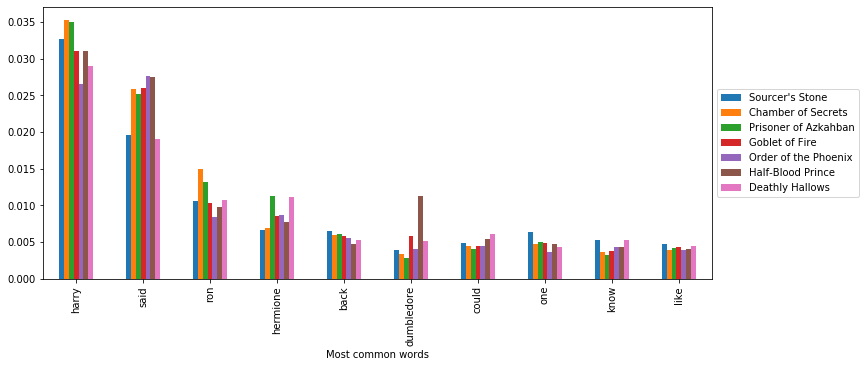

In [14]:
df2 = dist_df.head(10)
df2 = df2.drop("Total", axis=1)
df2.plot.bar(figsize=(12,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

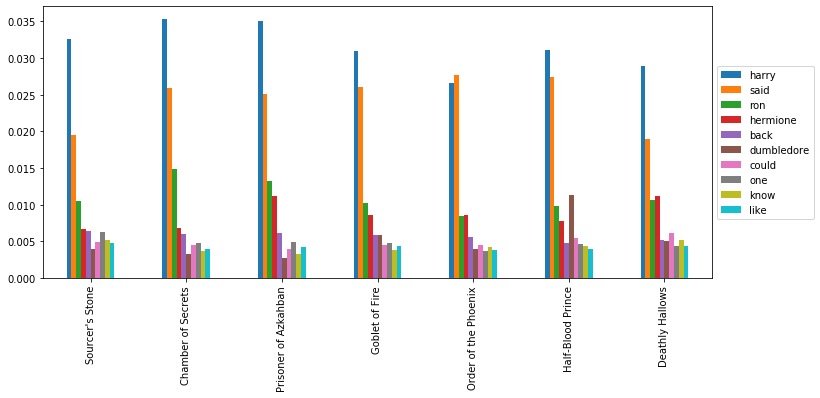

In [15]:
df3 = df2.T
df3.plot.bar(figsize=(12,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

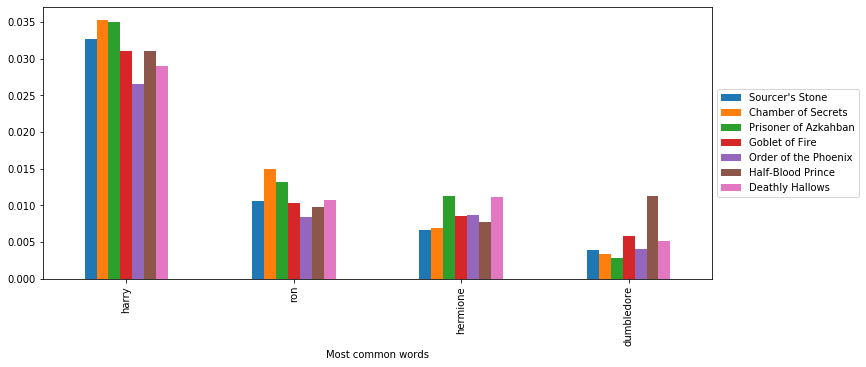

In [20]:
df4 = df3.drop(["said","back","could","one","know","like"], axis=1)
df4 = df4.T
df4.plot.bar(figsize=(12,5)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [16]:
dist_df.to_csv("Potter.csv")